In [2]:
# This code tests the trained 3d dq stepper
import numpy as np
import random

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

#for live plotting
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline

%run 3d_ipm_env.ipynb #imports LIPM Env

[0.  0.5] 0.35
[0.   1.45] 0.13
[0.   0.49] 100.35


<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABbHW1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABWBZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB5FfwSZP1AY4BPTxDXj4KQzU/N/Y99dGHI
szbodIp9ItDG8zk1oVl9zWyV73qUGoiqBOeJN8mOGHAxCggJfYd1k55u6xxibsYAAAMAQRav/fWO
8pMuJ5Z/WyOiduwVKYqkNi8bobDdl+mMbD7knFuX5t1JrjOx2FfMFU9cvQTxNRssIhLTtZKv5vn7
fnWlbf8hI8qKrgu2ZZivB8Lh+peXFJsLxq9b/+yeUgk5azzBpbub6HIfRpojUMd+GHezE9KGTc8y
BZeuv6bpI10n0+9KBIUA+0tLhyBc+wn4E1b/ZtM5qiLFM5oaxCxZQibGP/Hd0wRpHDVQujzybs2h
8oZdmgDPrQ9zjl7Op+YKb4dU/VLNSygvVraF2lPZGbTKBKqD0XScaBtKLI0dnUBr5bEsziRBm6xY
qvO1E0J2IC/rlCVZd41YlXQJjY5yrxBF8NfpxTHHdpPCKHcLsojgz+QuH0StAKX9HdDvzg2kJTyS
JxiTLnpLvUcFUx+URpU5Eg0TdhF51T7rz9HtmwU17iUX7hbIEpnj8y7IeND3kD2FJ208LbdD+1Gk
59faTWzkJRhBP0rNBWO3+haQ7c/25ct8dO0ilck7yyHUnU1ZCc+ywvxZmmNzcG5c35yM+WLkJU4a
EsRKZcApG2rb1HAK2/PRlQGCal1IJ6g43FVdakuIwBIls8AfwQC7q29JIJr9+kT8jS23yhOqEoHP
IW5/muy4Cj4h7TFPZiOipYh8hNpXrKMjBeiz5pp4gEArehtKYtWxvSaLQ3gPWRfK0K1HbABdIJUa
BpNuhHLqxqszc2DXTrwegJ62XPcxEStxjJn7ddrseb7TAUZ03Cdb/95l5wbRRLfHx4eYzp15syEe
jYld+Dap1HKlIgmjoXEbEGTdbJZRcAnBa9R2OvuBgwYKRnQtN/aZF3nfrQ9npsnF79cX1Ko1kvGb
tP/909mLbmKYvjG6YSWA+C38B84qejQI23hC+K4bvFEDT5tdBYTpo9czMnG4avvTCzaRxEQ7vTeW
j2EyjIfv1qHUYVvk0brVuCpL3JBKgNBz5dFOfCn7X112lr5Ejg6D5GUulVk4/zk45LLxx3zRMC0v
nWDNKjio/DveG5kkOiPnpPYU6DmBjv4tgJGz5yO4luuit/6VsCDCTKrI0xCu7f82ghN9Jazk8oLy
7tZif/SQugkH1erfJ13Gr57d7cl1OnbGBoSWQKSyLDgqvqNUrvKh5JdeRaSoW9v+83KiJlRURC+O
VIcghof3aJ45Gm/lQt8GjR1CTinEsROjFUUk+cp0Zf7LdJeb+EI6HjrajWFErNJa6zia4AP/OOdS
yDBTO/bqB2Z/Yb736F+GJWEaXT/2iEACToF+dPsv6mdLWb6adiEnlCJO2YZGqJNu2UEnQqpXTkuY
G+KcAaCdxGjxbXro+JMskiEe/8MXl3qYy3KGzos4zPejrXqsDHXmwCcQldnueZMIGVewCcg927LI
2/Yj90zNlF9/rfyFPuRJNlPV79Fed/dlfHcENR/8CcszBW6MrAwtGaHQDjenU4jnLpA1r++IJ0+3
+2fGMsLyx/Gw1ftfqa8AHlgSKfgTdDI0WdtpP9EilctnLz8O6qnwsBiaD2A2MR7kd88Rpryvthnl
raLsn28MtSCMvEbrkwEB6ysuqn5/Y9w1TdgJvZmpSWWHiuW2ra+r+XX6vz8ZpmBE69pCjsz8XL+m
oGMh9SIG+WbNnUPekMro+zgoVJap/9FcAM8UPCwDSnzMjgkG2vSxMhhSud2XfO16FBECmY139n+O
Zy5z4i5+KmyP15Lu/OBpgjqkZC9O+Z34KexknjIOfubqjP0G7rPWI2LfT1K/ywk/9ZNoorL7pnTb
bzwnS4Uv1MRZQKN0dfscrweRz9nBTnSbvOprKQoZEHmWN3dDfU+bRvRzbd6ZAnh6XivtHR1dBoGB
nSoj+o9UGylt72vu3NeKPhqredYW1bi7sTfmwz5vR+AE1W/3ktBenzR44cYqFHGaZc8e4Ua4s8ye
Hmhpx90eHBoe2ZY9Dv++xXLZIkuDOx7jnwegTRay/BTVmRmpoJWyZ42mq/piYVKf/7OMM/mgDGgx
ruSQIY1jbxPe3D6iE9r//HrGvDjBUPufdi3BPakENXbOvhhUyfWA71oAxB2UUVFStgMVpd0z7jMV
f0dyCPl6l56axCpAf2w8NvttPN1qYBoEOxIjMFBZi8Eg1Hlv+/bWjiprA+gzgxA756n9KJifqgWS
Z9TZtHRWEah3eeP0n2gRHhPzvPVqGhkxzrCkUeCz/Ot0HW9JxQmo6EqvyErVVHT6S6X+Pp+HDiwn
r9bpy4PLx4GUL6Cmnd1NrMA3UJ7yrCQYcPFfIIoDziQ2jZl4KjB3wMfl/6/xQnVkRuQuJMa2Kv3u
JZqcUAGo++GHUuo+l04f6/0M2KEQihMyDbUFjn2oAARP7LIcAKvXzGjNgtCS+x2c3ta33JwVHonb
HJ34O8OVwkyzhb5uOOIbYmX+LCNF6A2ZAAXrSJ8GikuDf+ikfNGbpjlZgee//wxncERh5qH9RtGA
lfr3DLeWrgRrkKmKNFme/lYXCXIMqpN1CzONdErzQlBSR8vdx7u00Y15I6xgKNpu6xHwWB9NDadr
7MSR3F/KuO5PNClebFmP8Lu5B1TMd3GC3Tpodu98JiN1AOoq9I/UPpla/4FF/nAzXQMGb3/K9RQC
yGJFFW4zzBvjzLhtcJoYYqKlQLfgl46sU+Mt1c8xdypdwEkRSyICNmYtA2QEoX7I8BVSYUh/9Rqt
8x9H+v0J5uFgVkc81IS5rGOKj7+Up7YbVzbl2/3gXnIskKzzQeQMJQlNJen4942yS9HA0/QwjECf
84EuAPaXLxMnt0cLzPkrY

In [3]:
class NN(nn.Module):
    def __init__(self, inp_size, out_size):
        
        super(NN, self).__init__()
        self.l1 = nn.Linear(inp_size, 512)
        self.l2 = nn.Linear(512, 512)
        self.l3 = nn.Linear(512, 512)
        self.l4 = nn.Linear(512, 512)
        self.l5 = nn.Linear(512, 512)
        self.l6 = nn.Linear(512, 512)
        self.l7 = nn.Linear(512, 512)
        self.l8 = nn.Linear(512, out_size)
    
    def forward(self, x):
        
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        x = F.relu(self.l5(x))
        x = F.relu(self.l6(x))
        x = F.relu(self.l7(x))
        x = self.l8(x)
        return x

In [4]:
class DQStepper:
    def __init__(self, no_actions = [9, 7], lr = 1e-4, gamma = 0.9, use_tarnet = False, trained_model = None):
        '''
        This is a 3d dq stepper.
        State = [x-ux, y-uy, z-uz, xd, yd, n, action_x, action_y, action_z]
        '''
        self.device = torch.device("cpu")
        self.dq_stepper = NN(11, 1).to(self.device) #state+ action -> q_value
        if trained_model:
            self.dq_stepper.load_state_dict(torch.load(trained_model))
            self.dq_stepper.eval()
        self.optimizer = torch.optim.SGD(self.dq_stepper.parameters(), lr)
        self.use_tarnet = use_tarnet
        if self.use_tarnet:
            self.dq_tar_stepper = NN(11, 1).to(self.device)
            self.dq_tar_stepper.load_state_dict(self.dq_stepper.state_dict())
            self.dq_tar_stepper.eval()
        self.gamma = gamma #discount factor
        assert len(no_actions) == 2
        self.no_actions = no_actions
        
        # This is the template of x_in that goes into the dq stepper
        self.max_step_height = 0.02
        self.delta = 2 #discretization of step height
        self.x_in = np.zeros((self.no_actions[0]*self.no_actions[1], 11))
        self.x_in[:,8] = np.tile(np.arange(self.no_actions[0]), self.no_actions[1])
        self.x_in[:,9] = np.repeat(np.arange(self.no_actions[1]), self.no_actions[0])
                  
    def predict_action_value(self, x):
        # this function predicts the q_value for different actions and returns action and min q value
        self.x_in[:,[0, 1, 2, 3, 4, 5, 6, 7]] = x
        self.x_in[:,10] = (1/(self.delta))*self.max_step_height*\
                            np.random.randint(-self.delta, self.delta+1, self.no_actions[0]*self.no_actions[1])
        torch_x_in = torch.FloatTensor(self.x_in, device = self.device)
        with torch.no_grad():
            q_values = self.dq_stepper(torch_x_in).detach().numpy()
            action_index = np.argmin(q_values)
            action_x = int(action_index%self.no_actions[0])
            action_y = int(action_index//self.no_actions[0])
            action_z = self.x_in[action_index,10]
        return [action_x, action_y, action_z], q_values[action_index]
    
    def tar_predict_action_value(self, x):
        # this function uses tar net to predict 
        # the q_value for different actions and returns action and min q value
        self.x_in[:,[0, 1, 2, 3, 4, 5, 6, 7]] = x
        self.x_in[:,10] = (1/(self.delta))*self.max_step_height*\
                            np.random.randint(-self.delta, self.delta+1, self.no_actions[0]*self.no_actions[1])
        torch_x_in = torch.FloatTensor(self.x_in, device = self.device)
        with torch.no_grad():
            q_values = self.dq_tar_stepper(torch_x_in).detach().numpy()
            action_index = np.argmin(q_values)
            action_x = int(action_index%self.no_actions[0])
            action_y = int(action_index//self.no_actions[0])
            action_z = self.x_in[action_index,10]
        return [action_x, action_y, action_z], q_values[action_index]
    
    def predict_eps_greedy(self, x, eps = 0.1):
        # This function returns prediction based on epsillon greedy algorithm
        if np.random.random() > eps:
            return self.predict_action_value(x)[0]
        else:
            action_x = np.random.randint(self.no_actions[0])
            action_y = np.random.randint(self.no_actions[1])
            action_z = 2*self.max_step_height*(np.random.rand() - 0.5)
            return [action_x, action_y, action_z]
        
    def optimize(self, mini_batch, tau = 0.001):
        # This function performs one step of back propogation for the given mini_batch data
        x_in = torch.FloatTensor(mini_batch[:,0:11].copy(), device = self.device)
        y_train = torch.FloatTensor(mini_batch[:,11].copy(), device = self.device)
        for i in range(len(mini_batch)):
            if not np.isnan(mini_batch[i,12:]).all():
                if not self.use_tarnet:
                    y_train[i] += self.gamma * self.predict_action_value(mini_batch[i,12:])[1]
                else:
                    y_train[i] += self.gamma * self.tar_predict_action_value(mini_batch[i,12:])[1]

        y_train = y_train.unsqueeze(1).detach() #ensures that gradients are not computed on this
        x_train = self.dq_stepper(x_in)

        loss = F.mse_loss(x_train, y_train)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        if self.use_tarnet:
            for tar_param, param in zip(self.dq_tar_stepper.parameters(), self.dq_stepper.parameters()):
                tar_param.data.copy_(tar_param.data * (1.0 - tau) + param.data * tau)
                
        return loss
    
    def live_plot(self, history, e, figsize=(15,25), window = 500, title='history'):
        clear_output(wait=True)
        clear_output(wait=True)
        fig, ax = plt.subplots(3, 1, figsize=figsize)
        ax[0].plot(history['epi_cost'], label='epi_cost', color = 'orange')
        ax[0].grid(True)
        ax[0].legend() # the plot evolves to the right
        if e > window:
            ax[1].plot(np.arange(e-window+1, e), history['epi_cost'][e-window:], label='epi_cost zoom')
            ax[1].grid(True)
            ax[1].legend() # the plot evolves to the right
        ax[2].plot(history['loss'], label='loss', color = 'black')
        ax[2].grid(True)
        ax[2].legend() # the plot evolves to the right
        ax[2].set_ylim(0, 60)
        plt.xlabel('episode')
        plt.show();
        
    def predict_q(self, x, terrain):
        #for debugging
        # this function predicts the q_value for different actions and returns action and min q value
        self.x_in[:,[0, 1, 2, 3, 4, 5, 6, 7]] = x
        self.x_in[:,10] = terrain
        torch_x_in = torch.FloatTensor(self.x_in, device = self.device)
        with torch.no_grad():
            q_values = self.dq_stepper(torch_x_in).detach().numpy()
            action_index = np.argmin(q_values)
            action_x = int(action_index%self.no_actions[0])
            action_y = int(action_index//self.no_actions[0])
            action_z = self.x_in[action_index,10]
            
        return q_values, [action_x, action_y, action_z] 

In [4]:
ht = 0.2
env = InvertedPendulumEnv(ht, 0.13, 0.28, [0.5, 3, 1.5], [11,9])
no_actions = [len(env.action_space_x), len(env.action_space_y)]
print(no_actions)

dqs = DQStepper(lr=1e-4, gamma=0.98, use_tarnet= True, no_actions= no_actions, trained_model='../../models/bolt/dqs_1')

[11, 9]


In [5]:
no_steps = 10 ## number of steps simulated per episode (pendulum steps)
step_time = 0.1 ## time after which step is taken

v_des = [0.0, 0]
# v_init = [2*(np.random.rand() - 0.5), np.random.rand() - 0.5]
v_init = [0, 0.0]
state = env.reset_env([0.0, 0.0, ht, v_init[0], v_init[1]], v_des, no_steps*step_time)
epi_cost = 0
for n in range(no_steps):
    terrain = 0.0*(np.random.randint(-4, 5, no_actions[0]*no_actions[1]))/4.0
    action = dqs.predict_q(state, terrain)[1]
    next_state, cost, done = env.step_env(action, step_time)
    print(action, cost, done, state[3:5])
    epi_cost += cost
    state = next_state
    if done:
        print(epi_cost)
        break
print("showing episode...")
# env.show_episode(5)
# env.show_episode_side(5)



NameError: name 'ht' is not defined

In [36]:
ht = 0.2
env = InvertedPendulumEnv(ht, 0.13, 0.28, [0.5, 3, 1.5], [11,9])
no_actions = [len(env.action_space_x), len(env.action_space_y)]
print(no_actions)

dqs_1 = DQStepper(lr=1e-4, gamma=0.98, use_tarnet= True, no_actions= no_actions, trained_model='../../models/dqs_1')
dqs_2 = DQStepper(lr=1e-4, gamma=0.98, use_tarnet= True, no_actions= no_actions, trained_model='../../models/dqs_3')

[11, 9]


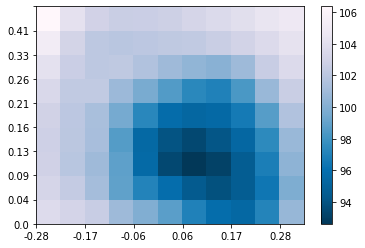

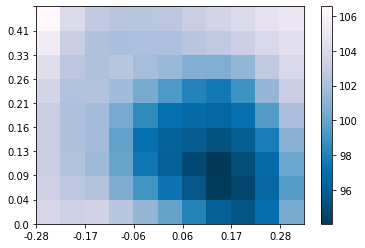

In [37]:
# This block is for visualising the output from the dqstepper

def plot_heatmap(x1, terr, dqs, env):
    q = dqs.predict_q(x1, terr)[0]
    n = dqs.no_actions
    q_mat = np.zeros((n[1], n[0]))
    for i in range(len(q)):
        q_mat[int(dqs.x_in[i,9]), int(dqs.x_in[i,8])] = q[i]
    fig, ax = plt.subplots()
    ax.set_xticklabels(env.action_space_x[::2])
    ax.set_yticklabels(env.action_space_y)
    heatmap = ax.pcolor(q_mat, cmap='PuBu_r')
    fig.colorbar(heatmap, ax=ax)
    plt.show()

x1 = [0, 0, 0.28, 0.5, 0, 1, 0, 0]
terrain_1 = 0.0*(np.random.randint(-4, 5, no_actions[0]*no_actions[1]))/4.0
plot_heatmap(x1, terrain, dqs_1, env)

x2 = [0, 0, 0.28, 0.5, 0, 1, 0, 0]
terrain_2 = -0.5*np.ones(no_actions[0]*no_actions[1])
plot_heatmap(x2, terrain_2, dqs_1, env)